In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# ЗАВАНТАЖЕННЯ ДАНИХ
df = pd.read_csv('hackathon_int20h_dataset_test.csv')
# ПЕРЕТВОРЕННЯ ДАТИ
df['created_at'] = pd.to_datetime(df['created_at'])
df['processed_at'] = pd.to_datetime(df['processed_at'])



In [2]:
#Первинна діагностика
print("--- Розмірність датасету ---")
print(df.shape) 

print("\n--- Типи даних та пропуски ---")
print(df.info()) 

print("\n--- Перші 5 записів ---")
print(df.head())

--- Розмірність датасету ---
(1000000, 18)

--- Типи даних та пропуски ---
<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   created_at          1000000 non-null  datetime64[us]
 1   order_id            1000000 non-null  int64         
 2   processed_at        1000000 non-null  datetime64[us]
 3   order_type          1000000 non-null  str           
 4   user_id             1000000 non-null  int64         
 5   ip_country          1000000 non-null  str           
 6   currency            1000000 non-null  str           
 7   amount              1000000 non-null  float64       
 8   payment_method      1000000 non-null  str           
 9   order_payment_type  599474 non-null   str           
 10  bin_country         1000000 non-null  str           
 11  bank_id             1000000 non-null  int64         
 12  psp_id 


Статистика статусів:
status
success    525114
fail       474886
Name: count, dtype: int64


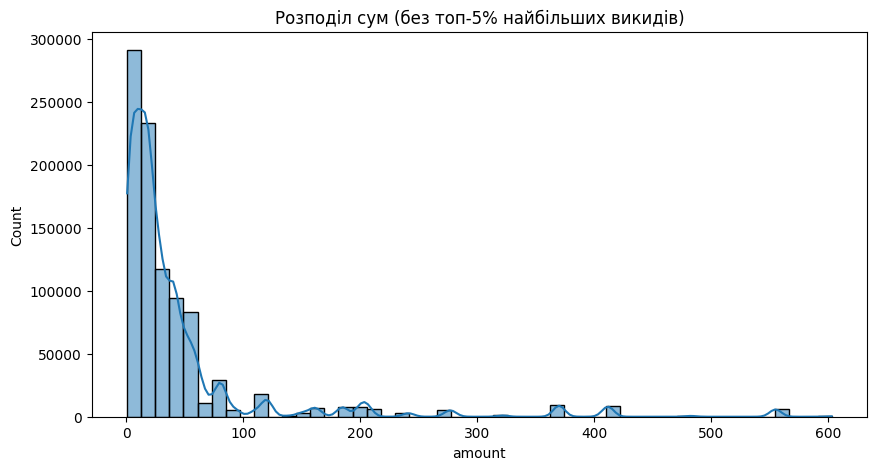


Топ-10 кодів помилок:
error_code
3.02    150121
3.08     90293
3.10     76797
2.12     44700
2.01     43696
3.04     42896
4.09     17647
4.03      1520
3.01      1468
0.01      1468
Name: count, dtype: int64


In [3]:
# 1. Перевірка дисбалансу класів
# Якщо у вас уже є колонка is_anomaly в навчальному наборі
if 'is_anomaly' in df.columns:
    print("Розподіл класів:")
    print(df['is_anomaly'].value_counts(normalize=True)) 
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x='is_anomaly', data=df)
    plt.title('Кількість нормальних (0) та аномальних (1) транзакцій')
    plt.show()

# 2. Аналіз статусів та помилок
# Аномалії часто корелюють зі статусом 'fail' 
print("\nСтатистика статусів:")
print(df['status'].value_counts())

# 3. Розподіл сум транзакцій (amount)
# Шукаємо "викиди" (дуже великі суми) 
plt.figure(figsize=(10, 5))
sns.histplot(df[df['amount'] < df['amount'].quantile(0.95)]['amount'], bins=50, kde=True)
plt.title('Розподіл сум (без топ-5% найбільших викидів)')
plt.show()

# 4. Кореляція помилок та аномалій
# Дивимося, які error_code виникають найчастіше 
top_errors = df['error_code'].value_counts().head(10)
print("\nТоп-10 кодів помилок:")
print(top_errors)
